# Parking Spot Probabilities
by Nicholas Archambault

### Original Question
*Suppose you're analyzing the utilization of a small parking lot you invested in. Customers enter the automated lot, receive a ticket, and select one of 20 spots at random (e.g. they are not assigned). Upon leaving, customers pay in relation to their time in the lot.*

*You have collected a dataset, `parking.csv`, which shows spot utilization for a month. Each number in the dataset corresponds to a spot number, one through 20, and the number of times it appears in a row corresponds to the frequency of how many customers parked in that spot.*

*Using all of this information, write code to visualize the Probability Mass Function (PMF) of your customers' spot selections. Your resultant chart should show each spot number along with the probability of that spot being chosen based on your dataset. You can ignore seasonality and assume this month represents a standard month of parking at your lot.*

### Solution
The prompt asks us to find and plot the PMF of parking spot distributions, a task that requires just a single line of code in programs like R and is not much more time- or effort-intensive in Python. Given that the data is discrete rather than continuous, we cannot reasonably attempt to construct the probability density function (PDF), a line of thinking that might otherwise constitute an interesting natural extension of the prompt. We can, however, create a couple interesting plots.

We begin by importing the usual packages and tools, as well as the dataset itself.

In [5]:
# Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("parking.csv")

# Set parameters for figures
plt.rcParams['figure.dpi'] = 200

print(data.head())
data.shape

   Spot #
0       1
1       1
2       1
3       1
4       1


(987, 1)

A quick examination of the data's head and shape reveals its curious format: a single column of numeric values, 987 in total. We know from the prompt that there are 20 parking spots tracked over the course of a month. The single column captures the frequency with which each spot is occupied over the course of that month. Each individual row represents an instance of a particular spot being occupied, and we can total the number of occurrences of each spot number to find the total number of times that spot was chosen.

In [6]:
data.columns = ["spot"]
data.spot = data.spot.astype(str)
parking = pd.DataFrame(data.groupby("spot").size()).reset_index()
parking.columns = ["spot", "count"]
parking

With a bit of reformatting, the data can be presented in a much more intuitive form. We now have two columns, one showing the spot number and the other tallying the total number of times that spot was parked in over the course of the month. As we have converted the `spot` column to a string data type, the dataset is presented in a curious order, but this will not impair our analysis.

To generate the probabilities associated with each parking spot – that is, $P(X = x)$, where $X$ is the random variable denoting a customer parking in a particular spot and $x$ is the number of that spot, one through 20 – we can simply divide the number of parking occurrences for each spot by the total parking occurrences across all spots.

In [8]:
total = parking["count"].sum()
parking.spot = parking.spot.astype(int)
parking = parking.sort_values(by = "spot").reset_index().drop(columns = "index")
parking["probs"] = parking["count"] / total
parking

This generates for each spot a probability showing how likely, based on the data, that spot is to be chosen on a particular day.

Armed with these probabilities, construction of the PMF is simple. The graph depicting the PMF is simply a plot of the probability associated with each parking spot: the complete collection of possibilities for $P(X = x)$.

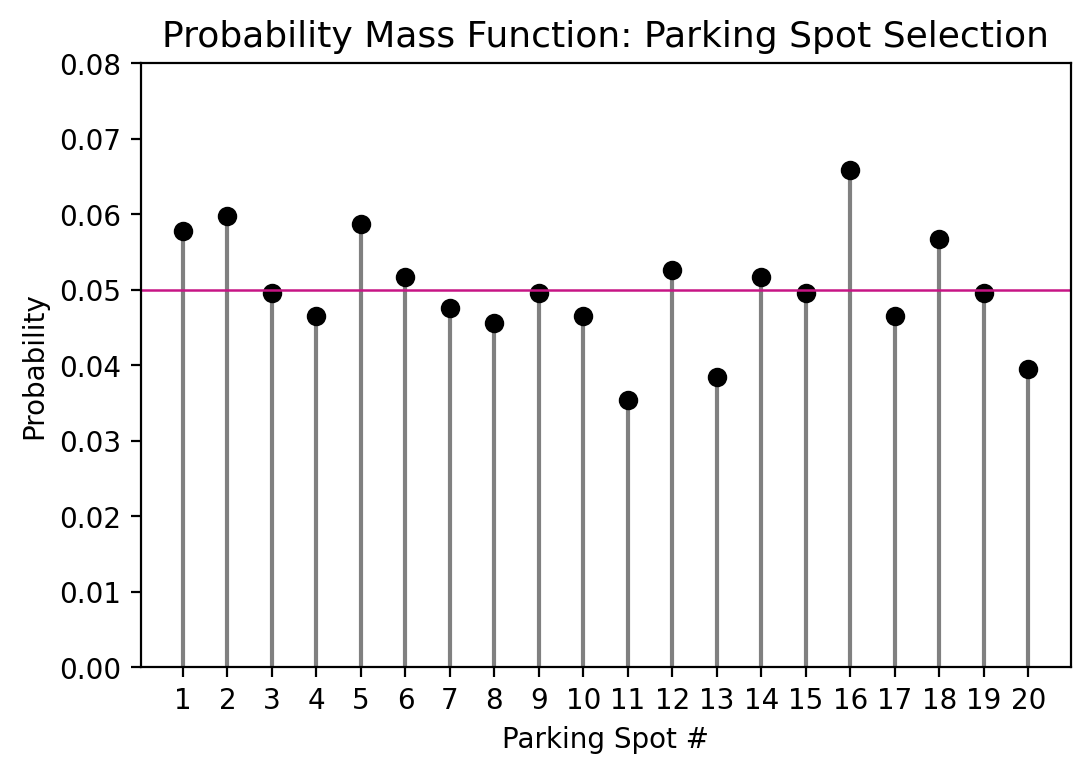

In [16]:
markerline, stemlines, baseline = plt.stem(range(1, 21), parking.probs, 
                                           use_line_collection = True, 
                                           basefmt = " ", markerfmt = "o", linefmt = "grey")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
plt.axhline(y = 0.05, 
            color = "mediumvioletred", 
            linewidth = 0.9)
plt.xticks(range(1, 21))
plt.ylim(0, 0.08)
plt.ylabel("Probability")
plt.xlabel("Parking Spot #")
plt.title("Probability Mass Function: Parking Spot Selection", fontsize = 13)    
plt.show()

In the plot, the magenta line represents the probabilities for each spot that would be expected under a uniform distribution. Inherently, we would expect no parking spot to be preferable over another. If this were a truly random variable, spots would be chosen by customers randomly and each would be selected 5% of the time. As it is, the data is not uniform. We observe probabilities that range upward to nearly 0.07 and down below 0.04. Individual spot probabilities are not included as labels for aesthetic purposes.

These disparities from what we expect may not ultimately be vast or particularly notable, but it's a bit difficult to perceive their true meaning from the PMF. We can create an offshoot plot that helps quantify how the likelihood of spots being chosen translates to an absolute number of monthly parking occurrences.

We create a new variable representing the number of parking occurrences above or below expectation that were generated by each parking spot over the past month. This is computed easily by finding the difference from the 0.05 baseline for each parking spot probability, then multiplying that value by the total number of occurrences, 987, and rounding to the nearest integer. For the sake of clarity in graphing, we use a string parsing technique to include a '+' sign for all parking spots that receive more parking occurrences than expected. 

In [12]:
diffs = round((parking.probs - 0.05) * total).astype(int).astype(str).str.replace(r"^([1-9])", r"+\1")
diffs

These absolute values are useful annotations for the modified stem plot of the PMF.

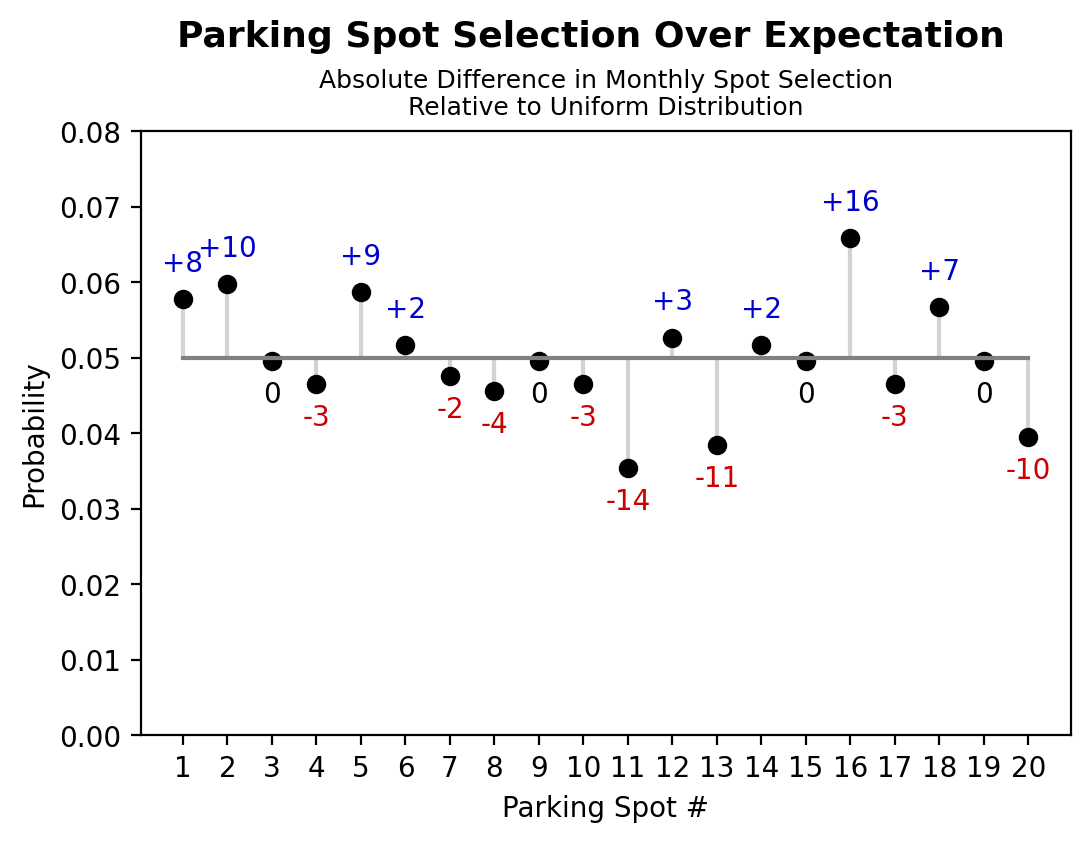

In [14]:
markerline, stemlines, baseline = plt.stem(range(1, 21), parking.probs, 
                                           use_line_collection = True, 
                                           bottom = 0.05, 
                                           basefmt = "grey", markerfmt = "o", linefmt = "lightgrey")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
plt.xticks(range(1, 21))
plt.ylim(0, 0.08)
plt.ylabel("Probability")
plt.xlabel("Parking Spot #")
plt.suptitle("Parking Spot Selection Over Expectation", fontsize = 13, y = 1.02, fontweight = "bold")
plt.title("Absolute Difference in Monthly Spot Selection\nRelative to Uniform Distribution", fontsize = 9)

for x, y in zip(range(1, 21), parking.probs):
    label = diffs[x - 1]
    plt.annotate(label, 
                 (x, y), 
                 textcoords = "offset points", 
                 xytext = np.where(y > 0.05, (0,10), (0, -15)), 
                 ha = 'center', 
                 color = np.where(y > 0.05, 
                                  (0, 0, 204/255), 
                                  np.where("-" not in label, 
                                           (0, 0, 0), 
                                           (204/255, 0, 0))))
    
plt.show()

This plot provides a clearer visual to show the disparity in parking occurrences for each spot over what is expected under a uniform distribution. Thanks to the `np.where()` function, values below expectation are coded red, values above expectation blue, and values equivalent to expectation – with a net monthly departure from expectation of 0 – black.

This type of visualization allows for better interpretability of the data. We previously saw, for example, that spot \#16 was chosen nearly two percentage points more often than expected, but we had no framework within which to evaluate the real-world impact of that knowledge. We now see that a roughly 2% increase in propensity to be chosen translates to 16 additional parking occurrences in that spot per month, or about one additional occurrence every two days.

Though it would be useful to collect more months' worth of data for corroboration, this plot makes it clear that some spots seem to be prefereable to customers and thus that an investor would be unwise to assume all spots are valued equally. Perhaps spots 1, 2 and 16 offer shade cover from trees, or maybe spots 11, 13 and 20 are particularly far from the entrance to a nearby building. Understanding customer choice as translated to absolute impact could be useful in informing policies or investor decisions with regard to future development of this parking lot and others.